# Workbook for Processing the P2FA forced alignment
By Katrina Li 2023.4.27

# Outline
1. Check the boundary

    Use `Check_P2FA.praat`

1. Modify the onset-rhyme boudnary

    Use `modify_boundaries.praat`

1. Generate the f0 tier

1. Modify the f0 boundary

1. Extract f0 and duration

    Use `extract_acoustics.py` (cf. InTone_Visualisation)


1. Check Visualitaion, mostly f0 data

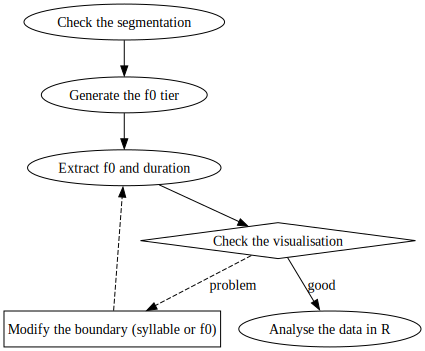

In [11]:
from graphviz import Digraph
dot = Digraph(comment = 'Outline')
dot.node("CheckB","Check the segmentation")
dot.node("Modify","Modify the boundary (syllable or f0)",shape = "box")
dot.node("Generatef0","Generate the f0 tier")
dot.node("Extract","Extract f0 and duration")
dot.node("Check","Check the visualisation",shape = "diamond")
dot.node("Finish","Analyse the data in R")
# connections
dot.edge("CheckB","Generatef0")
dot.edge("Generatef0", "Extract")
# dot.edge("Generatef0", "Modifyf0")
dot.edge("Modify","Extract",style = "dashed")
dot.edge("Extract","Check")
dot.edge("Check","Finish",label = "good")
dot.edge("Check","Modify",label = "problem", style = "dashed")
dot

##  Check the segmentation (syllable)

In this step, we check the segmentation returned from the P2FA forced alignment.

Run the praat script `checkP2FA.praat`. This file will read all files in the `textgrid_original` folder, and save the modified one into `textgrid_checked`.

For mac system, it is recommended to combine with the use of BetterTouchTool, so that you can specify short cut for the buttons of the scripts.

After finishing checking the files, remember to move all the files into `textgrid_original/processed` folder.

## Modify the boundary (f0 or syllable)

There are two ways to organise the modify process.

1.Put the files in the `/modify` folder, which can either be in `textgrid_checked` folder to modify onset-syllable boundarieds), or in `textgrid_pitch_batch` folder to modify the f0 boundaries.

Run the praat script `modify_boundaries.praat`, the go through the files in a folder

2.Use `open_target_files` to open individual file in either `textgrid_checked` or `textgrid_pitch_batch`, and then manually saved to the same place

**Log for Changhsa**

Changsha: the previous standard is a bit loose.

- add /j/ as an onset: 英，耶
- check the ending; also other boundaries in general
Next:
- iow instead of io - it's OK that this does not change!

Note for analysis Changsha:
- if there is SFP, then duration shall be excluded
- some in-sentence-adding is less sever, like 一杂杂，一杂
- but pay attention to the word following the noun - it can be a phrasing cue, e.g. 小英呐

- To delete: Changsha S10diaN1C1, S10diaN1D1
- S15diaN1系列 missing - now included, but some of them is probably too weak

|Date|Work|Comment|
|----|----|-------|
| 20230505 | complete S15diaN1D&D| should exclude S15diaN1C5.wav.TextGrid|
| 20230506 | complete A3 condition (16 files) | |
| 20230507 | complete B3 condition (16 files) | |
| 20230508 | complete C3 condition (16 files) | |
| 20230509 | complete D3 condition (16 files) | more scenarios that not conform to the template|
| 20230510 | complete F3 condition (16 files) | 修改字典：岳 多音字yue/yo，同时开头更像U介音而不是y; 鸭 通常有一个N辅音|
| 20230511 | complete F5 condition + S15-A5 (17 files)| 哒很多，可能只有/l/的动作；阐释：/y/介音的划分主要是把过渡段的音值排除，根据共振峰(F2)的变化; 需要修改script 改变zoom in的模式|
| 20230512 | complete B5 condition | 鸭的声母N信号可以很弱，又是伴有原因的glottalisation|
| 20230513 | nothing||
| 20230514 | nothing||
| 20230515 | nothing (compensated by 0518)||
| 20230516 | Write a script to cut the files | cut_condition4.praat|
| 20230517 | complete A4 | Talk to Francis about the voiced /z/ sounds like adding a syllable /i/|
| 20230518 | complete B4 & B2 （31 files)| Exclude S10diaB4; 问一下母语者, S20diaNB1有没有什么不一样; S22diaB4结尾有没有啊字, S22diaNB4有没有哒字|
|20230519 | C4 + B2/B2a (16 + 32 - 8 = 40 files)| check with Wanyang S22diaC4 ending with /a/ or not |
|20230520| Script data: extract_acoustics.py using diff_lab, and also generate data scheme |Exclude S10diaN1D1 & S10dian1C1, 都有一些阅读的不连贯|
|20230521| 可以成功使用f0_jump algorhithm (但是有待进一步修正）| |

### A commonly used step: Move selected files
1. In the `textgrid_original` folder, move files to unprocessed, so that some TextGrid will be processed later; Or more commonly, move all the files to `unprocessed` foler, and move files to be annotated out of thefolder. The code below demonstrates this purpose.

In [4]:
# Prerequisite
import os
from pathlib import Path
import shutil
import re

current_lang = "Changsha"
dir = os.path.join("/Users/kechun/Documents/0_PhD_working_folder", str(current_lang), "workflow")
directory = os.path.join(dir, "textgrid_original/unprocessed")
destination = os.path.join(dir, "textgrid_original")

targetsentence = ["B"]
targetfocus = ["2","2a"]
# targetid = ["S15"]
for ifile in os.listdir(directory):
    if ifile.endswith(".TextGrid"):
        filename = ifile.split(".")[0]
        parid = re.split("diaN?1?",filename)[0]
        condition = re.split("diaN?1?",filename)[1]
        tone = re.search("[A-F]T?",condition).group(0)
        focus = re.search("[1-5]a?",condition).group(0)
        if tone in targetsentence and focus in targetfocus:
            shutil.move(os.path.join(directory,ifile), destination)

2. For Condition4 files, we need an extra step of processing. We want to exclude the first part of the sentence so that our cheking workload can be reduced. 

    Move files from `/unprocessed` to `/old4`, then run the praat script `cut_condition4.praat`. After this, you will have the files saved to `textgrid_original` folder. You can follow the previosu steps.

    Do remember to move the cutted files from `old4` to `old4/processed`.

## Generate the f0 tier
The code below will call the praat script 'generate_f0_tier.praat', replace the original rhyme tier with a f0 tiers, where initial and ending periods where no f0 is dectected are deleted.

In [12]:
# This file will read specified files, and run the praat script
import subprocess
from itertools import product
import os
import shutil
import parselmouth
from parselmouth.praat import call
import math
par = ["S9"]
dia = ["dia", "diaN", "diaN1"]
sentence = ["C","D"]
focus = ["1","2","5"]
element_list = list(product(par,dia,sentence,focus))
current_lang = "Changsha"
dir = os.path.join("/Users/kechun/Documents/0_PhD_working_folder", str(current_lang), "workflow")
directory = os.path.join(dir, "textgrid_checked")
destination = os.path.join(dir, "textgrid_checked/processed")
# Open the sound
directory_sound = os.path.join(dir, "sound_original")

# Argument to the script
# The first three is to call the app and script
# Arg1: filename
# Arg2: textgriddir
# Arg3: sounddir
# Arg2: f0min (if 0, then the default two-pass pitch range calculation will be used)
# Arg3: f0max (if 0, then the default two-pass pitch range calculatio will be used)
# Other variables like file directory, the tiers can be modified
# Output: the updated f0 
for element in element_list:
    fullname = ''.join(element)
    filename = fullname + "_checked"
    # Open the sound
    soundname = os.path.join(directory_sound, fullname + ".wav")
    sound = parselmouth.Sound(soundname)
    # Calculate the best f0
    # The first pass
    pitch1 = call(sound, "To Pitch", 0.0, 50, 800)
    min1 = call(pitch1, "Get minimum", 0, 0, "Hertz", "None")
    max1 = call(pitch1, "Get maximum", 0, 0, "Hertz", "None")
    q1 = call(pitch1, "Get quantile", 0, 0, 0.25, "Hertz")
    q3 = call(pitch1, "Get quantile", 0, 0, 0.75, "Hertz")
    q1 = math.floor(q1)
    q3 = math.ceil(q3)
    # The second pass
    defaultf0floor = math.floor((0.7 * q1)/ 10) * 10
    defaultf0ceiling = math.ceil((2.5 * q3)/ 10) * 10
    # Run the script, not send, 
    subprocess.call(["/Applications/Praat.app/Contents/MacOS/Praat", "--run", "generate_f0_tier.praat", filename, directory, directory_sound, str(defaultf0floor),str(defaultf0ceiling)])
    path = filename + ".TextGrid"
    shutil.move(os.path.join(directory,path), destination)

## Extract f0 and duration

Open the script `extract_acoustics`, and specify the relevant parameters (e.g. which langauge is working on)

This will extract needed parameters that are easy to analyse.

This script mainly makes use of the python package Parselmouth, and also relies on a prespecified template of the materials.

In [ ]:
# Report the scope of the current files to be processed

# Report the texts of textgrid files to see if the match works?

## Check visualisation

Use 

## 